# Рубежная контрольная работа

*Эту работу выполнять не обязательно. Баллы, набранные за эту контрольную работу просуммируются с баллами, которые будут набраны за контрольную работу 2 и будут выставлены как оценка за экзамен "автоматом". Если вы не выполните эту работу, переписать её будет невозможно, просто приходите на экзамен и добирайте баллы там.*

Сделайте копию ноутбука

Присвойте переменной `v` значение свой табельный номер ИСУ, это нужно для определения вашего варианта. Запустите код в следующей ячейке.

In [ ]:
from datetime import datetime
current_datetime = datetime.now()
print(current_datetime)
v = 336071 # по умолчанию вписан мой номер

2023-10-27 07:06:55.287633


## Описание метрического алгоритма

Пусть задана обучающая выборка пар "объект-ответ" $X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}.$

Пусть на множестве объектов задана функция расстояния $\rho(x,x')$. Чем больше значение этой функции, тем менее схожими являются два объекта $x, x'$.
В простейшем случае используется евклидова метрика: $\rho(x,x') = \sqrt {\sum _{i=1}^{n}(x_{i}-x'_{i})^{2}}$,

Для произвольного объекта $u$ расположим объекты обучающей выборки $x_i$ в порядке возрастания расстояний до $u$:

$$\rho(u,x_{1; u}) \leq  \rho(u,x_{2; u}) \leq \cdots \leq \rho(u,x_{m; u}),$$
где через $x_{i; u}$ обозначается тот объект обучающей выборки, который является $i$-м соседом объекта $u$. Аналогичное обозначение введём и для ответа на $i$-м соседе: $y_{i; u}$. Таким образом, произвольный объект $u$ порождает свою перенумерацию выборки. В наиболее общем виде алгоритм ближайших соседей есть:
$$a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] w(i,u),$$
где $w(i,u)$ - заданная весовая функция, которая оценивает степень важности $i$-го соседа для классификации объекта $u$. Естественно полагать, что эта функция не отрицательна и не возрастает по $i$ (поскольку чем дальше объект, тем меньший вклад он должен вносить в пользу своего класса).

По-разному задавая весовую функцию, можно получать различные варианты метода ближайших соседей.

$w(i,u) = [i=1]$ - простейший метод ближайшего соседа;

$w(i,u) = [i\leq k]$ - метод $k$ ближайших соседей;

$w(i,u) = [i\leq k] q^i$ - метод $k$ экспоненциально взвешенных ближайших соседей, где предполагается константа $q < 1$




**Использование ядер сглаживания**

Для избежания неоднозначности ответа при классификации в качестве весовой функции $w(i, u)$ используют функцию ядра $K(r)$

Примеры ядер:

Triangular: ${\displaystyle K(r)=(1-|r|)}$,

Parabolic: ${\displaystyle K(r)={\frac {3}{4}}(1-r^{2})}$,

Tricube: ${\displaystyle K(r)={\frac {70}{81}}(1-{\left|r\right|}^{3})^{3}}$.

**Метод парзеновского окна**

Алгоритм $k$ ближайших соседей можно обобщить с помощью функции ядра. Рассмотрим два способа, которыми это можно сделать.

Метод парзеновского окна фиксированной ширины  $h$:
$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$

Метод парзеновского окна переменной ширины:
$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{\rho(u,x_{k+1; u})}\biggr)$$

Таким образом классификаторы, полученные при использовании этих методов, можно записать в следующем виде

Фиксированной ширины: $$a_h = a(u, X^m, \boldsymbol{h}, K) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$

Переменной ширины (фиксированное число соседей):
$$a_k = a(u, X^m, \boldsymbol{k}, K) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ y_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{\rho(u,x_{k+1; u})}\biggr)$$


# Задание 1 (7 баллов)

В задании требуется написать свою реализацию метрического алгоритма.

В качестве расстояния между объектами в этом задании используйте евклидово расстояние.

В качестве функции ядра используйте Triangular.

Для выбора варианта, запустите код в следующей ячейке



In [ ]:
if (int(str(v)[5]) % 2) == 0:
  print ('1.1 В алгоритме число соседей должно быть фиксированным. Настроить гиперпараметр k, для оценки качества использовать ROC-AUC')
else:
  print ('1.1 В алгоритме число соседей не должно быть фиксированным. Настроить гиперпараметр h (ширина окна), для оценки качества использовать использовать F1-меру')

if (int(str(v)[5]) % 2) == 0:
  print ('1.2 Построить график зависимости метрики качества на обучающей выборке от k')
else:
  print ('1.2 Построить график зависимости метрики качества на контрольной выборке от h')

1.1 В алгоритме число соседей не должно быть фиксированным. Настроить гиперпараметр h (ширина окна), для оценки качества использовать использовать F1-меру
1.2 Построить график зависимости метрики качества на контрольной выборке от h


Протестирйуте эту реализацию на наборе данных breast_cancer:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = load_breast_cancer()
print(data)
def split_data(data, target, cnt):
    idxs = np.random.shuffle(range(len(data)))

    learnset_data = data[idxs[:-cnt]]
    learnset_target = target[idxs[:-cnt]]
    testset_data = data[idxs[-cnt:]]
    testset_target = target[idxs[-cnt:]]
    return learnset_data, learnset_target, testset_data, testset_target

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# использовать метрику парзеновского окна (F1 мера)
# график зависимости от h
import numpy as np
from collections import Counter
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import f1_score

h_list = []
f1_list = []

# Евклидово расстояние между двумя объектами
def xy_distance(a, b):
  return np.linalg.norm(a - b)

# триангулярное ядро сглаживания
def triangular(r):
      return 1 - abs(r)

class KNN:
  def __init__(self, k=1, h=1):
      self.k = k
      self.h = h


  def _minmax_normalize_data(self, X):
    # Вычисление минимального и максимального значения для каждого признака
    min_val = np.min(X, axis=0)
    max_val = np.max(X, axis=0)

    # Минмаксная нормализация данных
    normalized_X = (X - min_val) / (max_val - min_val)

    return normalized_X


  def _count_errors(self, array1, array2):
      count = 0

      for i in range(len(array1)):
          if array1[i] != array2[i]:
              count += 1
      return count

  # избавление от шумовых и неинформативных объектов
  def _clean_dataset(self):
      df = pd.concat((pd.DataFrame(self.X_train), pd.Series(self.y_train, name='target')), axis='columns')

      df.drop_duplicates(inplace=True) # убираем дубликаты
      df.dropna(thresh=df.shape[1]*0.5, inplace=True) # Удаляем строки с более чем 50% отсутствующих значений

      self.y_train = np.array(df['target'])
      self.X_train = np.array(df.drop(columns=df.columns[-1],  axis=1))

  # Удаление выбросов из датасета обучения
  def _delete_outliers(self):
      lof = LocalOutlierFactor(n_neighbors=self.k)

      outliers = lof.fit_predict(self.X_train) == -1

      self.X_train = self.X_train[~outliers]
      self.y_train = self.y_train[~outliers]


  # подбор ширины парзеновского окна
  def _choose_h(self):
      max_h = len(self.X_train[0])
      chosen_h = 0
      max_F1score = 0
      for i in range(1, max_h + 1):
        self.h = i
        F1score = f1_score(self.predict(self.X_train, normalise=False), self.y_train)

        h_list.append(self.h)

        f1_list.append(F1score)
        if (max_F1score <= F1score):
            max_F1score = F1score
            chosen_h = i

      self.h = chosen_h

  def fit(self, X, y):
      self.X_train = self._minmax_normalize_data(X) # нормализация данных
      self.y_train = y
      self._clean_dataset()
      self._choose_h()
      self._delete_outliers()

  def predict(self, X, normalise=True):
      X_for_prediction = X
      if (normalise == True):
        X_for_prediction = self._minmax_normalize_data(X) # нормализация данных

      predictions = [self._predict(x) for x in X_for_prediction]
      return predictions

  def _predict(self, x):
      class_count = {}

      for i in range(len(self.X_train)):
          '''distance = triangular(distance(x, self.X_train[i]))
          weight = (1 / (np.sqrt(2 * np.pi) * self.h)) * np.exp(-0.5 * ((distance / self.h) ** 2))'''
          weight = triangular(xy_distance(x, self.X_train[i]) / self.h)
          '''distance = triangular(xy_distance(x, self.X_train[i]))
          weight = (1 / (np.sqrt(2 * np.pi) * self.h)) * np.exp(-0.5 * ((distance / self.h) ** 2))'''
          label = self.y_train[i]

          # Обновляем счетчики классов с учетом веса
          if label in class_count:
              class_count[label] += weight
          else:
              class_count[label] = weight

      # Находим класс с максимальным счетчиком
      max_count = 0
      max_label = None
      for label, count in class_count.items():
          if count > max_count:
              max_count = count
              max_label = label

      return max_label if max_label is not None else max(class_count)

In [ ]:
knn = KNN()
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print(y_test)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0
 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


Text(0, 0.5, 'f1')

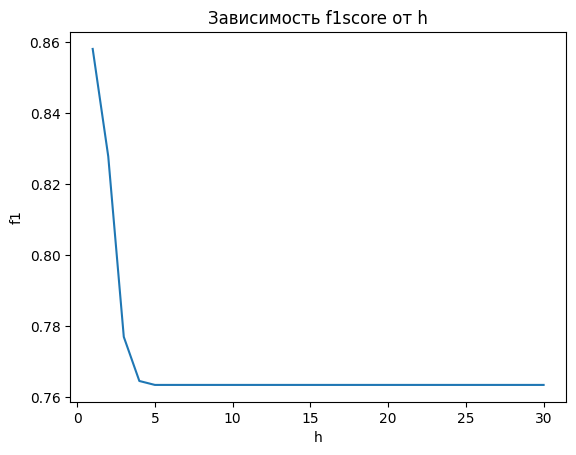

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h_list, f1_list)
plt.title("Зависимость f1score от h")
plt.xlabel("h")
plt.ylabel("f1")

In [ ]:
print(knn.h)

1


Может потребоваться предобработка данных

Штрафы:
* отсутствие реализации алгоритма (4 балла)
* ошибки в реализации алгоритма (2 балла)
* отсутствие настройки гиперпараметра (2 балла)
* ошибки в настройке гиперпараметра (1 балл)
* отсутствие графика (1 балл)

# Задание 2 (4 балла)

Требуется реализовать метрический алгоритм для предсказания действительного числа (то есть как в задаче регрессии, а не как в задаче классификации).

В задании 2 не используйте ядра и метод парзеновского окна.

Во этом задании в качестве исходных данных используется словарь кинокритиков и выставленных ими оценок

In [ ]:
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5,
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5,
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 3.5},
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0,
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0},
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

По этому словарю нужно сделать Dataframe в pandas. Строки - это критики, столбцы - названия фильмов. На пересечении поставленные оценки. При отсуствии оценки у критика за фильм в датафрейме нужно поставить 0.

In [ ]:
critics_df = pd.DataFrame(critics).T.fillna(0)
print(critics_df)

                  Lady in the Water  Snakes on a Plane  Just My Luck  \
Lisa Rose                       2.5                3.5           3.0   
Gene Seymour                    3.0                3.5           1.5   
Michael Phillips                2.5                3.0           0.0   
Claudia Puig                    0.0                3.5           3.0   
Mick LaSalle                    3.0                4.0           2.0   
Jack Matthews                   3.0                4.0           0.0   
Toby                            0.0                4.5           0.0   

                  Superman Returns  You, Me and Dupree  The Night Listener  
Lisa Rose                      3.5                 2.5                 3.0  
Gene Seymour                   5.0                 3.5                 3.0  
Michael Phillips               3.5                 0.0                 4.0  
Claudia Puig                   4.0                 2.5                 4.5  
Mick LaSalle                   3.0    

In [ ]:
# реализация kNN
import numpy as np
from collections import Counter
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import statistics

def distance(a, b):
  return np.linalg.norm(a - b)

class KNN:
  def __init__(self, k=1):
      self.k = k


  def _minmax_normalize_data(self, X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X, axis=0)
    normalized_X = (X - min_val) / (max_val - min_val)

    return normalized_X


  '''# первый выбор k - нечётный корень числа сэмплов
  def _choose_k(self):
      self.k = np.sqrt(len(self.X_train))

      self.k = round(np.sqrt(self.k))

      if self.k % 2 == 0:
          if self.k > np.sqrt(len(self.X_train)):
              self.k -= 1
          else:
              self.k += 1'''

  def _count_errors(self, array1, array2):
      count = 0

      for i in range(len(array1)):
          if array1[i] != array2[i]:
              count += 1
      return count

  # подбор k
  def _choose_k(self):
      max_k = len(self.X_train[0])
      chosen_k = 0
      min_errors = len(self.X_train) + 1
      for i in range(1, max_k + 1):
        self.k = i
        errors_count = self._count_errors(self.predict(self.X_train, normalise=False), self.y_train)
        if (min_errors > errors_count):
            min_errors = errors_count
            chosen_k = i

      self.k = chosen_k


  def _clean_dataset(self):
      df = pd.concat((pd.DataFrame(self.X_train), pd.Series(self.y_train, name='target')), axis='columns')

      df.drop_duplicates(inplace=True)
      df.dropna(thresh=df.shape[1]*0.5, inplace=True)

      self.y_train = np.array(df['target'])
      self.X_train = np.array(df.drop(columns=df.columns[-1],  axis=1))

  def _delete_outliers(self):
      lof = LocalOutlierFactor(n_neighbors=self.k)

      outliers = lof.fit_predict(self.X_train) == -1

      self.X_train = self.X_train[~outliers]
      self.y_train = self.y_train[~outliers]



  def fit(self, X, y):
      self.X_train = self._minmax_normalize_data(X)
      self.y_train = y
      self._clean_dataset()
      self._choose_k()
      self._delete_outliers()

  def predict(self, X, normalise=True):
      X_for_prediction = X
      if (normalise == True):
        X_for_prediction = self._minmax_normalize_data(X)

      predictions = [self._predict(x) for x in X_for_prediction]
      return predictions

  def _predict(self, x):
      # вычисляем расстояние
      distances = [distance(x, x_train) for x_train in self.X_train]

      # получаем k ближайших cоседей
      k_indices = np.argsort(distances)[:self.k]
      k_neighbours = [self.y_train[i] for i in k_indices]

      return statistics.mean(k_neighbours)



Для выбора варианта, запустите код в следующей ячейке

In [ ]:
if (int(str(v)[4]) % 2) == 0:
  print ('2.1 Сделайте предсказание оценок для критика Toby по фильмам, которые он ещё не видел')
else:
  print ('2.1 Сделайте предсказание оценок для фильма You, Me and Dupree по критикам, которые его ещё не видели')
print ('2.2 Объясните как оценить качество полученного предказания')

2.1 Сделайте предсказание оценок для фильма You, Me and Dupree по критикам, которые его ещё не видели
2.2 Объясните как оценить качество полученного предказания


In [ ]:
import pandas as pd

In [ ]:
target_name = 'You, Me and Dupree'

data_test = critics_df.loc[critics_df[target_name] == 0]
print(data_test)

                  Lady in the Water  Snakes on a Plane  Just My Luck  \
Michael Phillips                2.5                3.0           0.0   

                  Superman Returns  You, Me and Dupree  The Night Listener  
Michael Phillips               3.5                 0.0                 4.0  


In [ ]:
data_train = critics_df[critics_df[target_name] > 0]
print(data_train)

               Lady in the Water  Snakes on a Plane  Just My Luck  \
Lisa Rose                    2.5                3.5           3.0   
Gene Seymour                 3.0                3.5           1.5   
Claudia Puig                 0.0                3.5           3.0   
Mick LaSalle                 3.0                4.0           2.0   
Jack Matthews                3.0                4.0           0.0   
Toby                         0.0                4.5           0.0   

               Superman Returns  You, Me and Dupree  The Night Listener  
Lisa Rose                   3.5                 2.5                 3.0  
Gene Seymour                5.0                 3.5                 3.0  
Claudia Puig                4.0                 2.5                 4.5  
Mick LaSalle                3.0                 2.0                 3.0  
Jack Matthews               5.0                 3.5                 3.0  
Toby                        4.0                 1.0                 0.0 

In [ ]:
X_train, y_train = data_train.drop(labels=target_name, axis=1).values.tolist(), data_train[target_name].values.tolist()
X_test = data_test.drop(labels=target_name, axis=1).values.tolist()

In [ ]:
print(y_train)

[2.5, 3.5, 2.5, 2.0, 3.5, 1.0]


In [ ]:
knn = KNN()
knn.fit(X_train, y_train)
print('Michael Phillips', knn.predict(X_test))

Michael Phillips [2.5]


<ipython-input-66-8143a8ef1c7f>:22: RuntimeWarning: invalid value encountered in divide
  normalized_X = (X - min_val) / (max_val - min_val)


Подбор k и оценка качества алгоритма проводилась с помощью подсчёта количества ошибок для объектов тестовой выборки (поиск такого количества соседей, чтобы ошибка была минимальной)

Штрафы:
* отсутствие реализации алгоритма (2 балла)
* ошибки в реализации алгоритма (1 балл)
* отсутствие тестирования алгоритма (1 балл)
* отсутствие объяснения оценки качества алгоритма (1 балл)

После завершения контрольной работы, дайте ссылку на ноутбук в отдельном followup discussion в своей теме на Piazza. Дайте разрешение на его просмотр.

Не забудьте запустить код в последней ячейке для контроля времени выполнения.

In [ ]:
current_datetime = datetime.now()
print(current_datetime)

2023-10-27 08:25:17.875708
